# GIS-based multi-criteria analysis for the mapping of suitable sites for onshore wind farms, case study area: southern France
   #         ***IFKIRNE Mohammed & EL BOUHI Houssam*** 

# A.0 Introduction
***The objective of this study is to delineate suitable areas for the implementation of an onshore wind farm near the Alps in the South of France in the department of VAR in the Provence-Alpes-Côte d'Azur region. 
This is the least productive region in France with 48 MW of installed capacity in 2019.***

In [1]:
# Importation des modules
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from PIL import Image
from matplotlib.colors import LightSource
import skimage
import skimage.io

#  A.1 Preprocessing of DEM data 

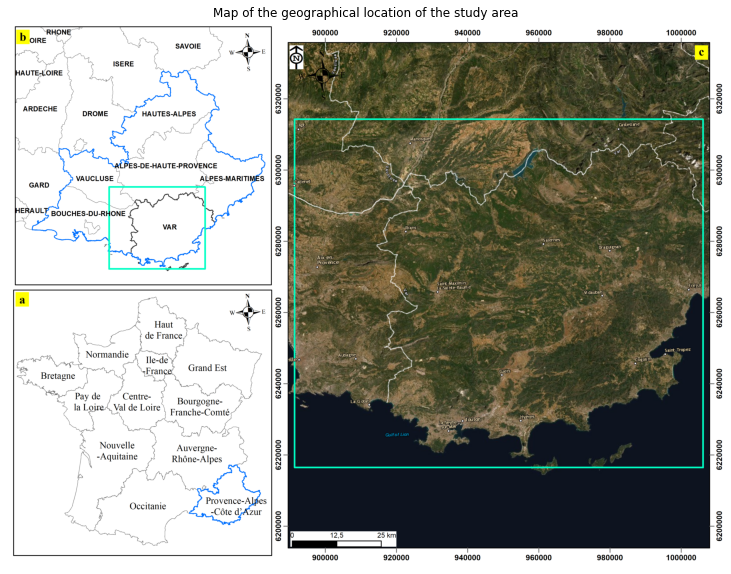

In [2]:
# Import the location map of the study area
study_area = skimage.io.imread("situa_geo_var.png")
# Display of the location map of the study area
plt.figure(figsize=(14, 10))
plt.imshow(study_area)
#plt.xlabel('Easting X (m)')
#plt.ylabel('Northing Y (m)')
plt.axis('off')
plt.title("Map of the geographical location of the study area")
plt.show()


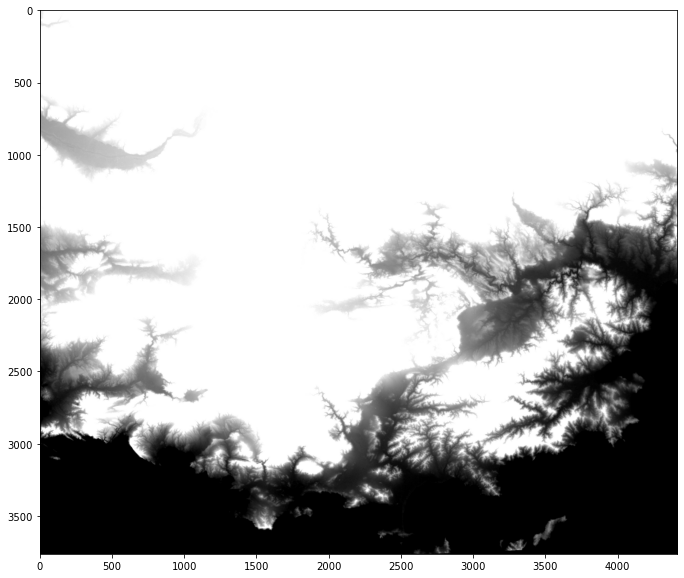

In [3]:
img = Image.open("mosaic_dem_pro_Clip12.tif") # loading of DEM 
plt.figure(figsize=(14, 10))
plt.imshow(img)
plt.show()

In [4]:
array_dem = np.asarray(img,dtype='float32') # Transform raster to matrix
array_dem.shape # visualize the dimensions of the matrix


(3763, 4414)

In [5]:
# Method for defining the raster extent

dx = 26   ## Definition of constants (width and length of pixels of the image)
dy = 26
X=range(891389,891389 + array_dem.shape[1] * dx,dx)
Y=range(6216440,6216440 + array_dem.shape[0] * dy,dy)
X,Y

(range(891389, 1006153, 26), range(6216440, 6314278, 26))

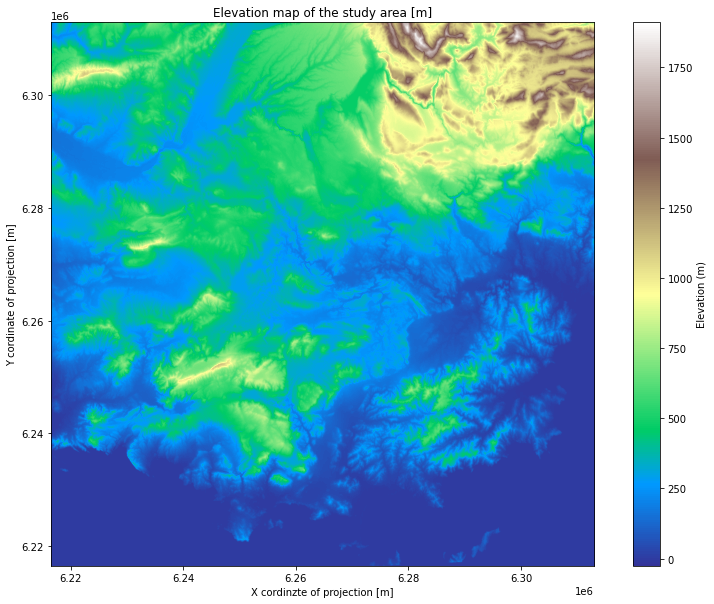

In [6]:
# Show the area of interest using the imshow function as a function of latitude (between 849344 and 917573) and longitude (6788223 and 6855834). 
plt.figure(figsize=(14,10))
plt.imshow(array_dem, extent = [6216440, 6312977, 6216440, 6312977],cmap='terrain')
plt.colorbar(label="Elevation (m)")
plt.xlabel('X cordinzte of projection [m]')
plt.ylabel('Y cordinate of projection [m]')
plt.title("Elevation map of the study area [m]")
plt.show()

# A.2 Calculation of the average slopes
***The slope calculation equation (Using the gradient function we can calculate the average slope 𝜃 (in degrees) for each pixel in the area of interest): \begin{equation*} \theta=tan^{-1}(|gradient(z)|)\times \frac{180}{\pi}
\end{equation*}***

In [7]:
# Évaluer un gradient en deux dimensions
def slope(dem):
    dx = 26
    dy = 26
    px,py = np.gradient(dem,dx,dy)
    slope = np.sqrt(px**2 + py**2)
    slope_deg = np.degrees(np.arctan(slope))
    return slope_deg

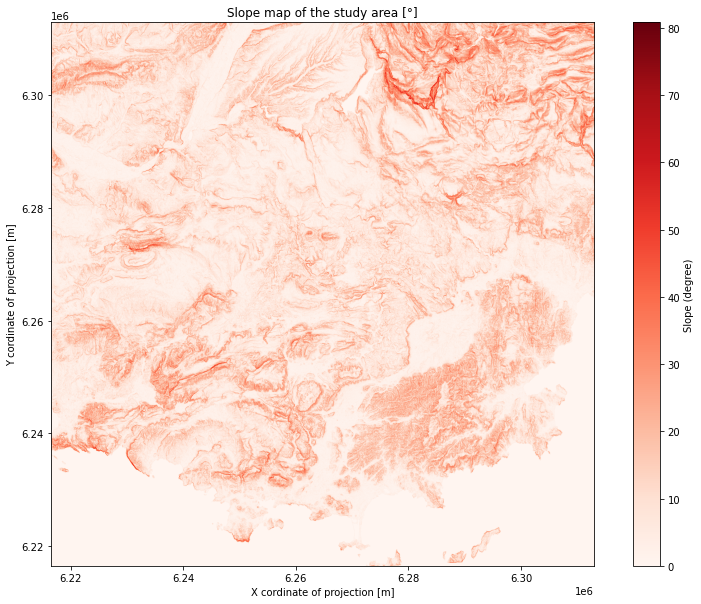

In [8]:
# Mise en page de la carte des pentes
plt.figure(figsize=(14,10))
plt.imshow(slope(array_dem), extent = [6216440, 6312977, 6216440, 6312977],cmap='Reds')
plt.colorbar(label="Slope (degree)")
plt.xlabel('X cordinate of projection [m]')
plt.ylabel('Y cordinate of projection [m]')
plt.title("Slope map of the study area [°]")
plt.show()

# A.3 Define the appropriate slope areas

In [9]:
# Extraction of slopes less than 15 degree
pente_apte = slope(array_dem) <= 15
pente_apte

array([[ True,  True,  True, ..., False, False, False],
       [ True,  True,  True, ..., False, False, False],
       [ True,  True,  True, ..., False, False, False],
       ...,
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True]])

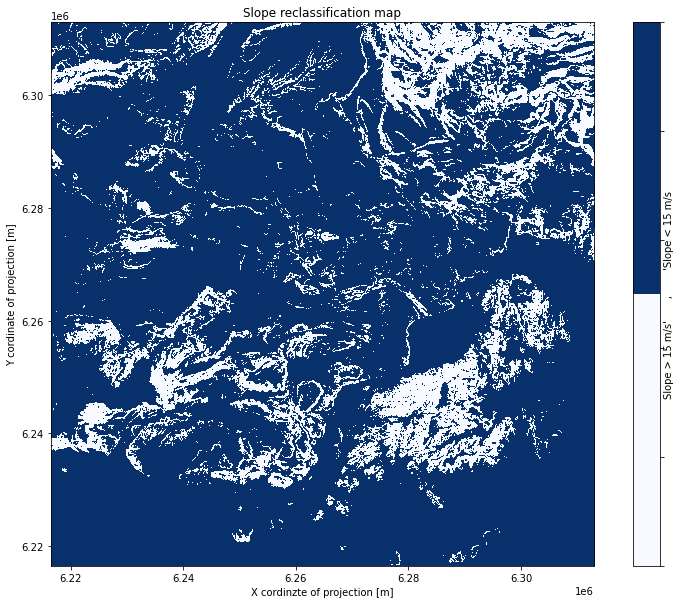

In [10]:
# Layout of the "slope" criterion
cmap_binary = plt.get_cmap('Blues', 2)
plt.figure(figsize=(14,10))
plt.imshow(pente_apte,cmap =cmap_binary, extent = [6216440, 6312977, 6216440, 6312977])
cb = plt.colorbar(label="Slope > 15 m/s'       ,        'Slope < 15 m/s")
cb.ax.yaxis.set_tick_params(labelright=False)
plt.xlabel('X cordinzte of projection [m]')
plt.ylabel('Y cordinate of projection [m]')
plt.title("Slope reclassification map")
plt.show()

# A.4 Define appropriate elevation areas

In [11]:
Alt_apte = array_dem <= 1000 # Extraction of elevation value less than 1000 m
#Alt_apte = np.where((array_dem >= 50) & (array_dem < 1500), 1, 0)
Alt_apte

array([[ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       ...,
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True]])

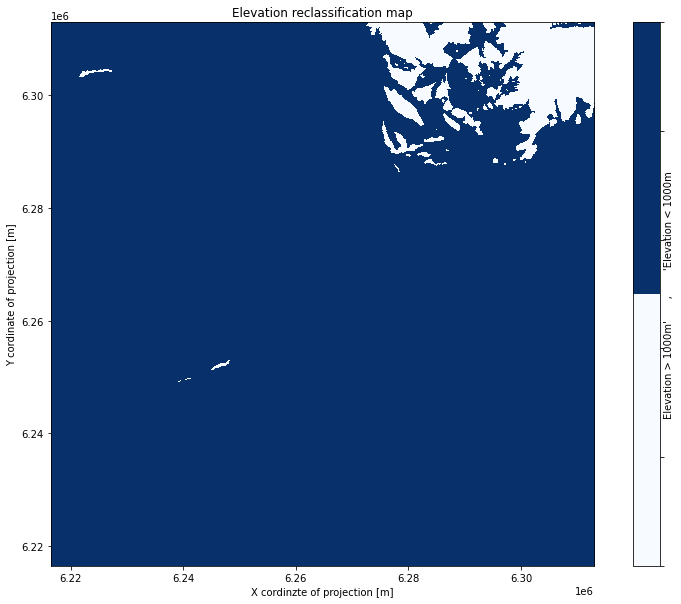

In [12]:
# Layout of the "distance to protected areas" criterion
cmap_binary = plt.get_cmap('Blues', 2)
plt.figure(figsize=(14,10))
plt.imshow(Alt_apte,cmap =cmap_binary, extent = [6216440, 6312977, 6216440, 6312977])
cb = plt.colorbar(label="Elevation > 1000m'       ,        'Elevation < 1000m") 
cb.ax.yaxis.set_tick_params(labelright=False)
plt.xlabel('X cordinzte of projection [m]')
plt.ylabel('Y cordinate of projection [m]')
plt.title("Elevation reclassification map")
plt.show()

# A.5 Definition of High Wind Speed Areas 

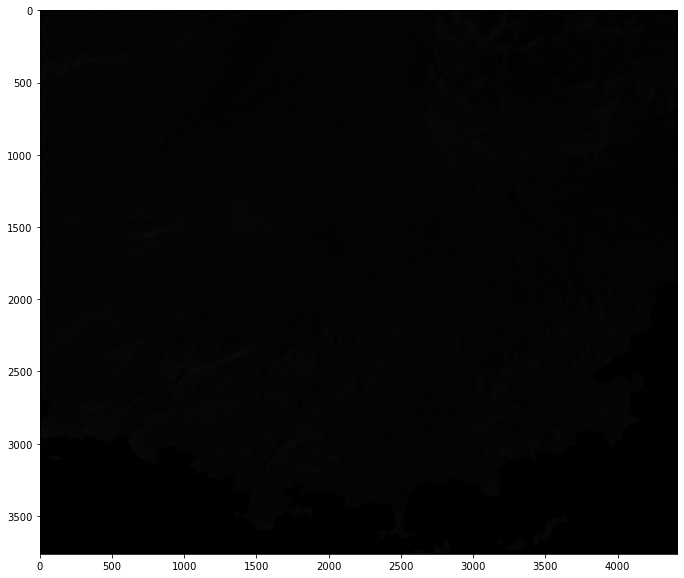

In [13]:
wind = Image.open("wind_12.tif") # loading the wind raster
plt.figure(figsize=(14, 10))
plt.imshow(wind)
plt.show()

In [14]:
array_wind = np.asarray(wind,dtype="float32")
array_wind.shape

(3763, 4414)

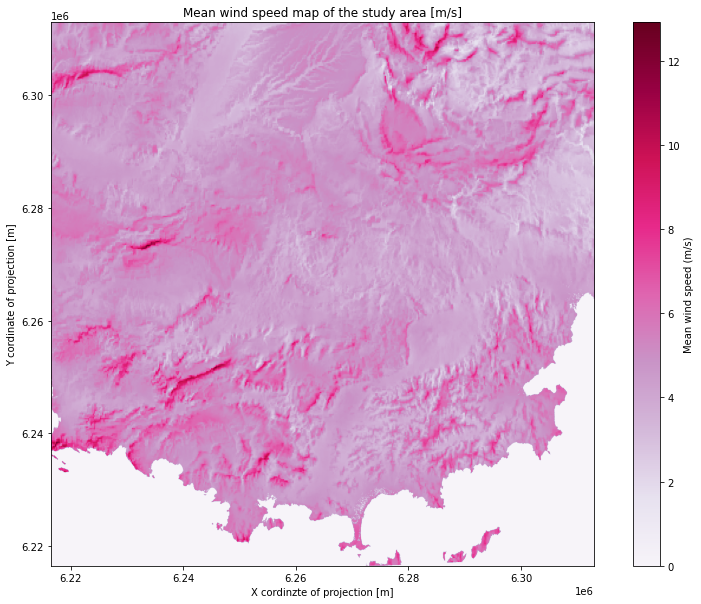

In [15]:
# Show the area of interest using the imshow function as a function of latitude (between 849344 and 917573) and longitude (6788223 and 6855834). 
plt.figure(figsize=(14,10))
plt.imshow(array_wind,cmap='PuRd', extent = [6216440, 6312977, 6216440, 6312977])
plt.colorbar(label="Mean wind speed (m/s)")
plt.xlabel('X cordinzte of projection [m]')
plt.ylabel('Y cordinate of projection [m]')
plt.title("Mean wind speed map of the study area [m/s]")
plt.show()

In [16]:
# Extraction of wind areas higher than 5 m/s
suitable_wind = array_wind >= 5
suitable_wind

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

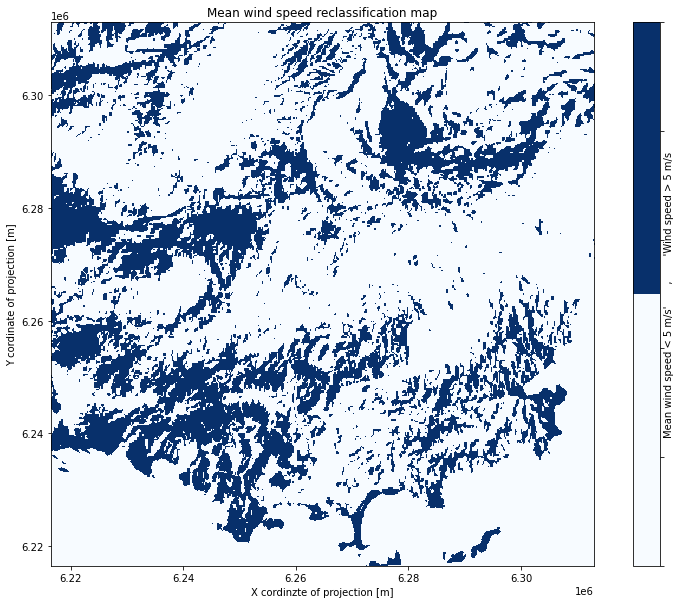

In [17]:
# Layout of the "distance to protected areas" criterion
cmap_binary = plt.get_cmap('Blues', 2)
plt.figure(figsize=(14,10))
plt.imshow(suitable_wind,cmap =cmap_binary, extent = [6216440, 6312977, 6216440, 6312977])
cb = plt.colorbar(label="Mean wind speed < 5 m/s'       ,        'Wind speed > 5 m/s")
cb.ax.yaxis.set_tick_params(labelright=False)
plt.xlabel('X cordinzte of projection [m]')
plt.ylabel('Y cordinate of projection [m]')
plt.title("Mean wind speed reclassification map")
plt.show()

# A.6 Buffer exclusion zones: protected areas

In [18]:
protected_area = Image.open("essaie_protec_area.tif") # Loading of the buffer zones raster of the protected areas
array_protected_area = np.asarray(protected_area) # transform the image into a numpy array
array_protected_area

array([[  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

In [19]:
# Extraction of the appropriate zones: 255 corresponds to buffer zones > 2000m and 0 corresponds to buffer zones < 2000m
array_protected_area_aptes = array_protected_area != 0
array_protected_area_aptes.shape

(3762, 4414)

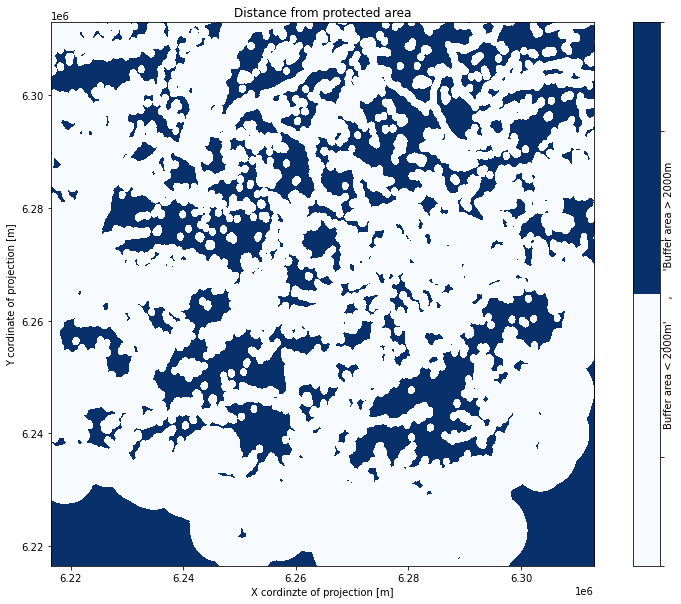

In [20]:
# Layout of the "distance to protected areas" criterion
cmap_binary = plt.get_cmap('Blues', 2)
plt.figure(figsize=(14,10))
plt.imshow(array_protected_area_aptes,cmap =cmap_binary, extent = [6216440, 6312977, 6216440, 6312977])
cb = plt.colorbar(label="Buffer area < 2000m'       ,        'Buffer area > 2000m")
cb.ax.yaxis.set_tick_params(labelright=False)
plt.xlabel('X cordinzte of projection [m]')
plt.ylabel('Y cordinate of projection [m]')
plt.title("Distance from protected area")
plt.show()

# A.7 Buffer zones: Installation and substations

In [21]:
poste_electrique = Image.open("new_poste_trasnport.tif") # Loading of the buffer zones raster of the substations
array_poste_electrique = np.asarray(poste_electrique,dtype='float32') 
array_poste_electrique

array([[  0.,   0.,   0., ..., 255., 255., 255.],
       [  0.,   0.,   0., ..., 255., 255., 255.],
       [  0.,   0.,   0., ..., 255., 255., 255.],
       ...,
       [255., 255., 255., ..., 255., 255., 255.],
       [255., 255., 255., ..., 255., 255., 255.],
       [255., 255., 255., ..., 255., 255., 255.]], dtype=float32)

In [22]:
# Extraction of suitable zones: 0 is the code for buffer zones < 1500m from substations
array_poste_electrique_aptes = array_poste_electrique != 255
array_poste_electrique_aptes.shape

(3545, 4414)

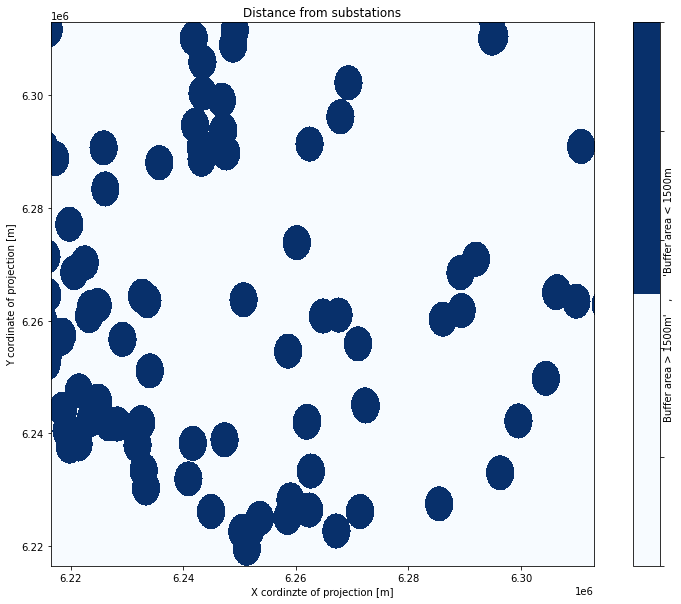

In [23]:
# Layout of the "distance to substaions" criterion
plt.figure(figsize=(14,10))
plt.imshow(array_poste_electrique_aptes,cmap =cmap_binary, extent = [6216440, 6312977, 6216440, 6312977])
cb = plt.colorbar(label = "Buffer area > 1500m'    ,       'Buffer area < 1500m")
cb.ax.yaxis.set_tick_params(labelright=False)
plt.xlabel('X cordinzte of projection [m]')
plt.ylabel('Y cordinate of projection [m]')
plt.title("Distance from substations")
plt.show()

# A.8 Accessibility criteria : distance from highways and roads

In [24]:
roads = Image.open("new_Roads.tif") # Loading of the buffer zones raster of the roads
array_roads = np.asarray(roads,dtype='float32') 
array_roads

array([[  0.,   0.,   0., ...,   0.,   0.,   0.],
       [  0.,   0.,   0., ...,   0.,   0.,   0.],
       [  0.,   0.,   0., ...,   0.,   0.,   0.],
       ...,
       [255., 255., 255., ..., 255., 255., 255.],
       [255., 255., 255., ..., 255., 255., 255.],
       [255., 255., 255., ..., 255., 255., 255.]], dtype=float32)

In [25]:
# Extraction of suitable zones: 0 is the code for buffer zones < 1000m from roads
array_roads_aptes = array_roads != 255
array_roads_aptes

array([[ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

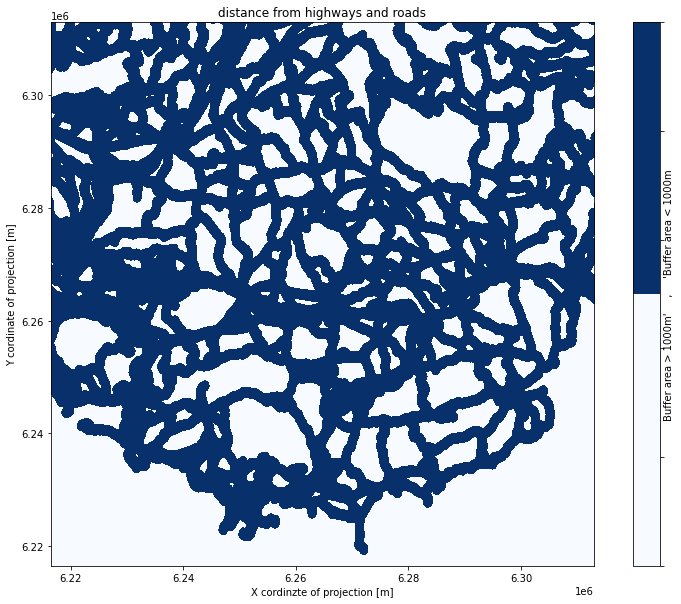

(3762, 4414)

In [26]:
# Layout of the "distance to roads" criterion
plt.figure(figsize=(14,10))
plt.imshow(array_roads_aptes, extent = [6216440, 6312977, 6216440, 6312977],cmap=cmap_binary)
cb = plt.colorbar(label = "Buffer area > 1000m'     ,     'Buffer area < 1000m")
cb.ax.yaxis.set_tick_params(labelright=False)
plt.xlabel('X cordinzte of projection [m]')
plt.ylabel('Y cordinate of projection [m]')
plt.title("distance from highways and roads")
plt.show()
#plt.savefig('ot.tif')
array_roads_aptes.shape


# Criteria synthesis map

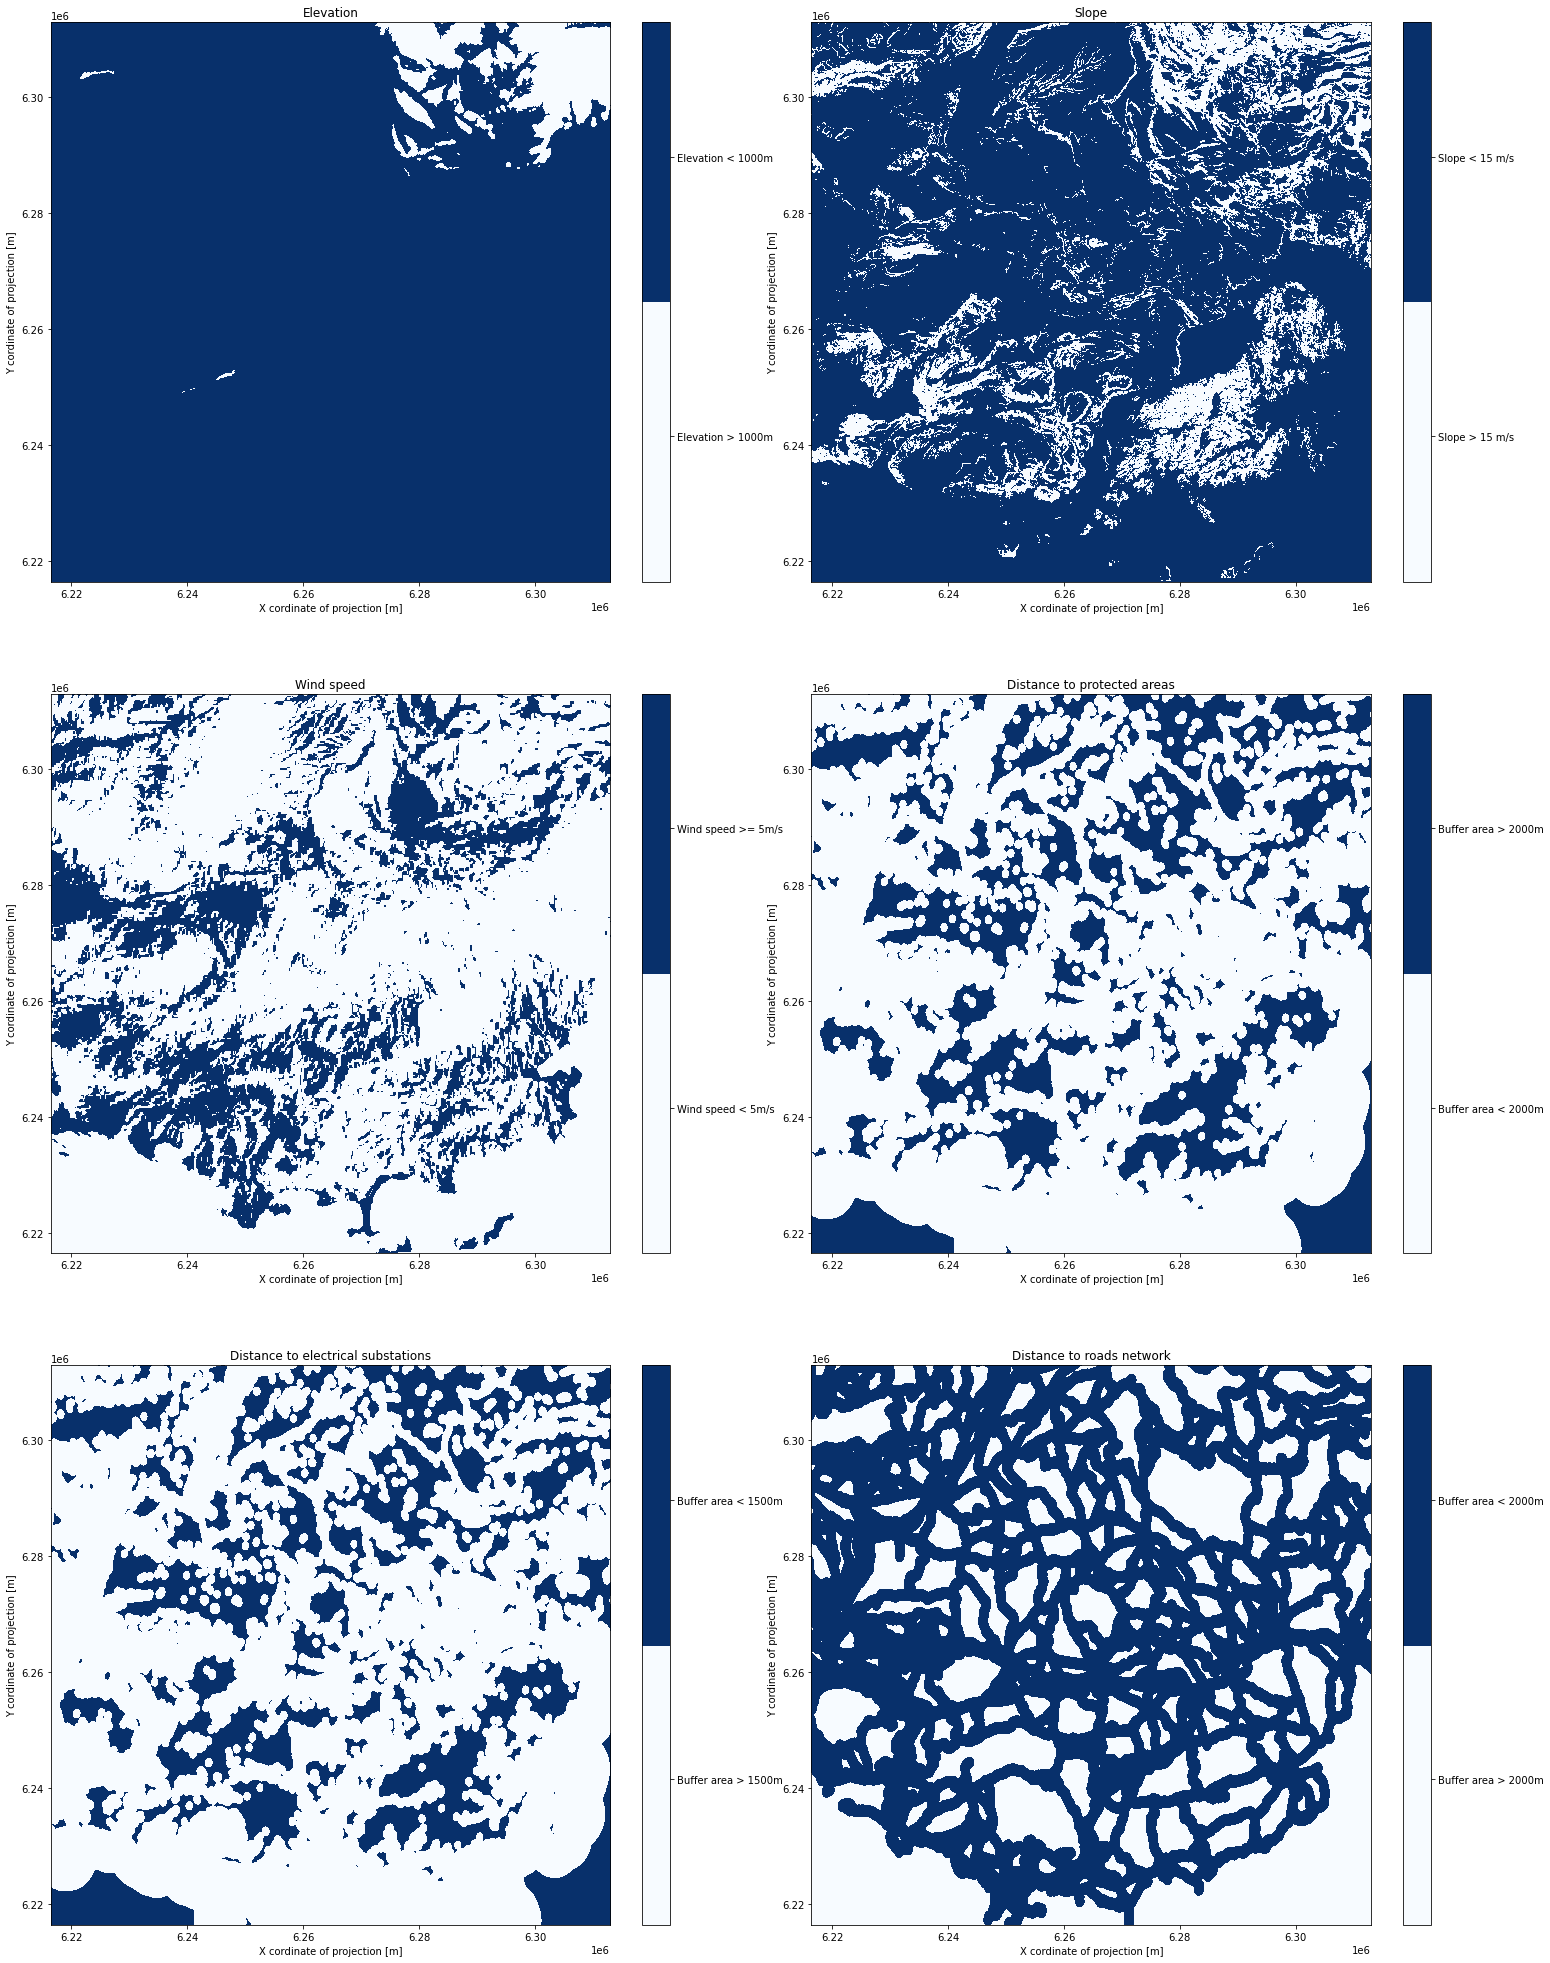

In [30]:
# Création d'une palette discrète
cmap_binary = plt.get_cmap('Blues', 2)

fig1, ax = plt.subplots(nrows=3, ncols=2, figsize=(25,35))

criteria = [Alt_apte,pente_apte,suitable_wind,array_protected_area_aptes,array_poste_electrique_aptes,array_roads_aptes]
title = ['Elevation','Slope','Wind speed','Distance to protected areas','Distance to electrical substations','Distance to roads network']
legend = [['Elevation > 1000m',  'Elevation < 1000m'],['Slope > 15 m/s',  'Slope < 15 m/s'],['Wind speed < 5m/s', 'Wind speed >= 5m/s'],['Buffer area < 2000m', 'Buffer area > 2000m'],['Buffer area > 1500m', 'Buffer area < 1500m'],['Buffer area > 2000m', 'Buffer area < 2000m']]
k = 0
for i in range(3):
    for j in range(2):
        t=0
        while(k < len(criteria)):
            image=ax[i,j].imshow(criteria[k],cmap=cmap_binary,extent = [6216440, 6312977, 6216440, 6312977])
            ax[i,j].set_xlabel('X cordinate of projection [m]')
            ax[i,j].set_ylabel('Y cordinate of projection [m]')
            ax[i,j].set_title(title[k])
            cb0 = fig1.colorbar(image, ax=ax[i,j], fraction=0.045, pad=0.05)
            cb0.set_ticks([0.26, 0.76])
            cb0.ax.set_yticklabels([legend[k][t],legend[k][t+1]])
            break
        k = k+1
fig1.savefig('hamid3.png',format='svg', dpi=1200)

# The suitability map for onshore wind farms in the study area:

In [28]:
# resize the matrices of our criteria to avoid dimensional problems in the application of calculations on the matrices
array_wind = np.resize(array_wind,(3545, 4414)) # Number of columns : 3545 Number of rows: 4414
array_dem = np.resize(array_dem,(3545, 4414))  
array_roads_aptes = np.resize(array_roads_aptes,(3545, 4414))
array_protected_area_aptes = np.resize(array_protected_area_aptes,(3545, 4414))
array_poste_electrique_aptes = np.resize(array_protected_area_aptes,(3545, 4414))

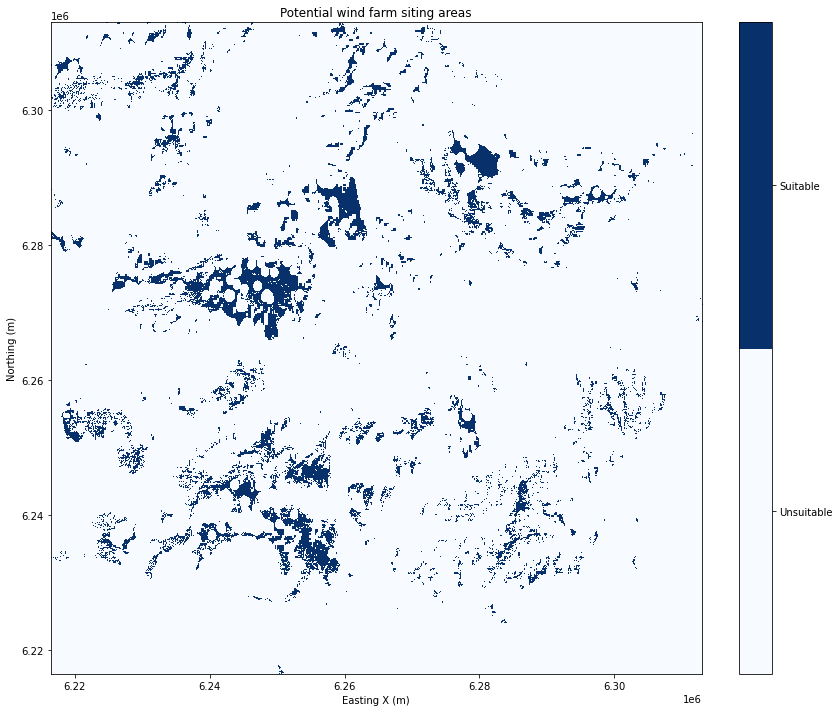

In [29]:
# Weighting of the criteria 
array_dem2 = array_dem*0.03
pente_apte2 = slope(array_dem)*0.05
wind_apte2 = array_wind*0.39
array_protected_area_aptes2 = array_protected_area_aptes*0.26
array_roads_aptes2 = array_roads_aptes*0.13
array_poste_electrique_aptes2 = array_poste_electrique_aptes * 0.13

# Recalls suitable areas for each criterion after weighting
Alt_apte3 = array_dem2 <= 30
pente_apte3 = pente_apte2 < 0.75
wind_apte3 = wind_apte2 >= 1.95
array_roads_aptes3 = array_roads_aptes2 != 66.3
array_protected_area_aptes3 = array_protected_area_aptes2 != 0
array_poste_electrique_aptes3 = array_poste_electrique_aptes2 != 33.15

# Weighted overlay 
zones_propices = (Alt_apte3) & (pente_apte3) & (wind_apte3) & (array_protected_area_aptes3) & (array_roads_aptes3) & (array_poste_electrique_aptes3)

# Display of the final map of suitable areas for the implementation of wind farms 

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(14,10))

image1 = ax.imshow(zones_propices, extent = [6216440, 6312977, 6216440, 6312977], cmap = cmap_binary, interpolation='none')
ax.set_xlabel('Easting X (m)')
ax.set_ylabel('Northing (m)')
ax.set_title("Potential wind farm siting areas")
cb1 = fig.colorbar(image1, ax=ax, fraction=0.046, pad=0.04)
cb1.set_ticks([0.25, 0.75])
cb1.ax.set_yticklabels(['Unsuitable', 'Suitable'])

plt.tight_layout()
#plt.savefig('Carte_Finale.tif')
plt.show()

# A.7 Calculation of the area of the zones identified for the implantation of wind turbines

In [27]:
# Calculation of the number of pixels corresponding to the suitable areas
somme_px = np.sum(np.array(zones_propices) == True)
print(f"In total, {somme_px} pixels defining the areas identified for the implantation of wind turbines")

# Calculation of the area of all these pixels
area_m2  = somme_px * dx * dy
area_km2 = area_m2 * 1e-6

# Calculation and display of the total area of the study area according to the extent used in the study
# extent = [6216440, 6312977, 6216440, 6312977]
surface_study_area_m2 = (6312977-6216440) * (6312977 - 6216440)
surface_study_area_km2 = surface_study_area_m2 * 1e-6
# area_dem_km2 = array_dem.shape[0] * dy * array_dem.shape[1] * dx * 1e-6
print(f"the total area of the study area is {round(surface_study_area_km2)} km².")

# The area of suitable zones in relation to the area of the study zone
print(f"""The identified areas have a surface of {area_m2} m², equivalent to {round(area_km2)} km².
This is approximately {(area_km2 / surface_study_area_km2 * 100)}% of the surface of the study area.""")

In total, 962612 pixels defining the areas identified for the implantation of wind turbines
the total area of the study area is 9319 km².
The identified areas have a surface of 650725712 m², equivalent to 651 km².
This is approximately 6.982490770155489% of the surface of the study area.
